# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [5]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [51]:
# Run this code:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [50]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [52]:
fifa['ValueNumeric'] = fifa['Value'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [53]:
# Your code here:
model_PosFoot = ols('ValueNumeric ~ Position*fifa["Preferred Foot"]', data = fifa).fit()
sm.stats.anova_lm(model_PosFoot)

,df,sum_sq,mean_sq,F,PR(>F)
Position,26.0,1.649609e+16,6.344651e+14,20.957327,6.868224e-97
"fifa[""Preferred Foot""]",1.0,2.341622e+14,2.341622e+14,7.734728,5.422475e-03
"Position:fifa[""Preferred Foot""]",26.0,5.152828e+15,1.981857e+14,6.546369,5.153228e-23
Residual,18093.0,5.477500e+17,3.027414e+13,NaN,NaN


What is your conclusion from this ANOVA?

In [54]:
# Your conclusions here:
# With this ANOVA we can assert with 99.99% confidence level that varying positions get paid significantly different.}
# It appears that preferred foot also has an impact, as well as the combination of Position and PreferredFoot

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [55]:
# Your code here:
model_Nat = ols('ValueNumeric ~ Nationality', data = fifa).fit()
sm.stats.anova_lm(model_Nat)

,df,sum_sq,mean_sq,F,PR(>F)
Nationality,163.0,3.281224e+16,2.013021e+14,6.762478,4.840477e-134
Residual,18043.0,5.370951e+17,2.976751e+13,NaN,NaN


What is your conclusion from this ANOVA?

In [13]:
# It can be concluded that nationality does influence the value of the players

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [56]:
# Your code here:
fifa.dropna(axis=0,inplace=True)
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            17918 non-null  object 
 1   Age             17918 non-null  int64  
 2   Nationality     17918 non-null  object 
 3   Overall         17918 non-null  int64  
 4   Potential       17918 non-null  int64  
 5   Club            17918 non-null  object 
 6   Value           17918 non-null  object 
 7   Preferred Foot  17918 non-null  object 
 8   Position        17918 non-null  object 
 9   Weak Foot       17918 non-null  float64
 10  Acceleration    17918 non-null  float64
 11  SprintSpeed     17918 non-null  float64
 12  Stamina         17918 non-null  float64
 13  Strength        17918 non-null  float64
 14  LongShots       17918 non-null  float64
 15  Aggression      17918 non-null  float64
 16  Interceptions   17918 non-null  float64
 17  Positioning     17918 non-null 

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [57]:
# Your code here:
X = sm.add_constant(fifa[['Stamina','SprintSpeed']])
y = fifa.ValueNumeric
linreg_sp_st = sm.OLS(y, X).fit()
print(linreg_sp_st.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Wed, 02 Feb 2022   Prob (F-statistic):          8.04e-193
Time:                        13:00:07   Log-Likelihood:            -3.0350e+05
No. Observations:               17918   AIC:                         6.070e+05
Df Residuals:                   17915   BIC:                         6.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.07e+06   1.97e+05    -15.600      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [58]:
# Your conclusions here
# We can see with a small r-squared that unfortunately the model does not do a great job of predicting change in the dendent variable
# A small p-value indicates that we can reject the null hypothesis that states that the coefficients are 0.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [59]:
# Your code here:
X_pot = sm.add_constant(fifa.Potential)
y = fifa.ValueNumeric
linreg_pot = sm.OLS(y, X_pot).fit()
print(linreg_pot.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:02:08   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [60]:
# Your conclusions here:
# Potential appears to have a rather medium effect on Value, with an R-Squared of .336%
# With a p-value approaching 0, the model is confident the coefficient of the dependent variable is not 0

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

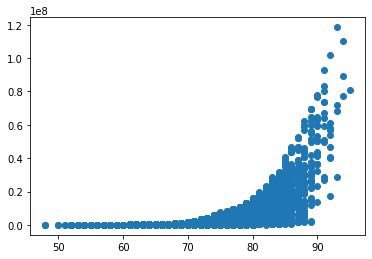

In [61]:
# Your code here:
plt.scatter(fifa.Potential,fifa.ValueNumeric)

In [66]:
# There indeed appears to be a relationship although I wouldn't call it linear, moreso exponential